In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [231]:
ctr=pd.read_csv('C:\CTR_Prediction\ctr.csv')

#### Issues with Dataset and Solution

1. Dirty Data
- **`Daily Time Spent on Site->`** 
    - Zero null value
    - Convert datatype into float32
    - Not Normal Distribution

- **`Age`**
    - Zero null value
    - Convert datatype into int32
    - Almost Normal Ditribution

- **`Area Income`**
    - Zero null value
    - almost normal distribution

- **`Daily Internet Usage`**
    - Zero null value
    - almost normal distribution
    
- **`Ad Topic Line`**
    - Zero null value
    - there is 50 sub categores more dominate to other sub categories are less dominate
    
    
- **`Gender`**
    - zero null value
    - `53.76%` Female and `46.24%` Male `Balanced gender Attribute`
    - categorical data convert into numerical

- **`Click on Ad`**
    - Zero null value
    - `50.83%` -> 0 and `49.17%` -> 1 `balanced click on ad attribute`


2. Messay Data

- **`Duplicate`** Drop duplicate values
- **`Transformation and scaling`**
    - **`Daily Time Spent on Site`,`Age`,`Area of Income`,`Daily Internet Usage`:-** we apply here Scaling or Transformatkion
- **`Timestamp`** Month extract from timestamp attribute and drop timestamp attribute

In [232]:
ctr=ctr.drop_duplicates()

In [233]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   int64  
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Ad Topic Line             9785 non-null   object 
 5   City                      9785 non-null   object 
 6   Gender                    9785 non-null   object 
 7   Country                   9785 non-null   object 
 8   Timestamp                 9785 non-null   object 
 9   Clicked on Ad             9785 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 840.9+ KB


In [234]:
ctr['Age']=ctr['Age'].astype('int32')

In [235]:
# month extract from timestamp


ctr['Timestamp']=pd.to_datetime(ctr['Timestamp'])
ctr['Timestamp_month']=ctr['Timestamp'].dt.month_name()
ctr['Timestamp_date']=ctr['Timestamp'].dt.day
ctr['date']=ctr['Timestamp'].dt.date

In [236]:
# ctr.drop('Timestamp',inplace=True,axis=1)

In [237]:
ctr['Timestamp_date']

0        9
1       16
2       29
3       21
4       21
        ..
9994    20
9995     3
9996    28
9997     5
9998     4
Name: Timestamp_date, Length: 9785, dtype: int32

In [238]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  9785 non-null   float64       
 1   Age                       9785 non-null   int32         
 2   Area Income               9785 non-null   float64       
 3   Daily Internet Usage      9785 non-null   float64       
 4   Ad Topic Line             9785 non-null   object        
 5   City                      9785 non-null   object        
 6   Gender                    9785 non-null   object        
 7   Country                   9785 non-null   object        
 8   Timestamp                 9785 non-null   datetime64[ns]
 9   Clicked on Ad             9785 non-null   int64         
 10  Timestamp_month           9785 non-null   object        
 11  Timestamp_date            9785 non-null   int32         
 12  date                     

In [239]:
# balanced dataset
cout=pd.DataFrame(ctr['Clicked on Ad'].value_counts()/len(ctr['Clicked on Ad'])*100)
cout.rename(columns={'count':'Data percentage'},inplace=True)
cout

,Data percentage
Clicked on Ad,
0,51.139499
1,48.860501


In [240]:
#categorical data
cat_ctr=['Ad Topic Line', 'City', 'Gender', 'Country','Timestamp_month']
#numerical data
num_ctr=['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Timestamp_date']

In [241]:
ctr[num_ctr].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,9785.0,61.601379,15.698216,32.60,48.03,59.59,76.27,90.97
Age,9785.0,35.839550,8.538524,19.00,29.00,35.00,41.00,60.00
Area Income,9785.0,53948.143348,13360.051625,13996.50,44174.25,56180.93,62669.59,79332.33
Daily Internet Usage,9785.0,177.886144,40.861875,105.22,140.15,178.92,212.87,269.96
Timestamp_date,9785.0,14.382115,8.593459,1.00,7.00,14.00,21.00,31.00


In [242]:
ctr[cat_ctr].describe().T

,count,unique,top,freq
Ad Topic Line,9785,559,Cloned explicit middleware,323
City,9785,521,Hubbardmouth,330
Gender,9785,2,Female,5268
Country,9785,207,Australia,346
Timestamp_month,9785,7,January,1642


<Axes: xlabel='Daily Internet Usage', ylabel='Count'>

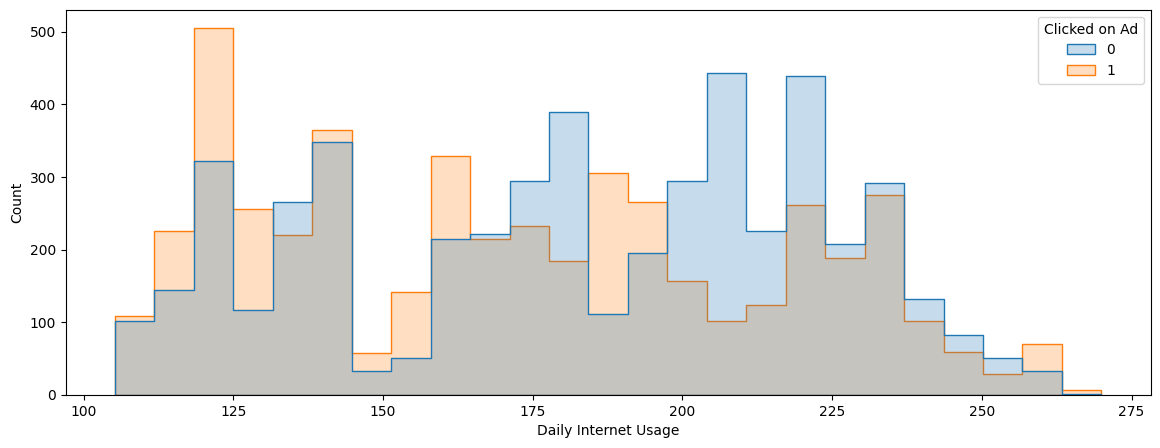

In [243]:
plt.figure(figsize=(14,5))
sns.histplot(ctr,x='Daily Internet Usage',hue='Clicked on Ad',element='step')

<Axes: xlabel='Age', ylabel='Count'>

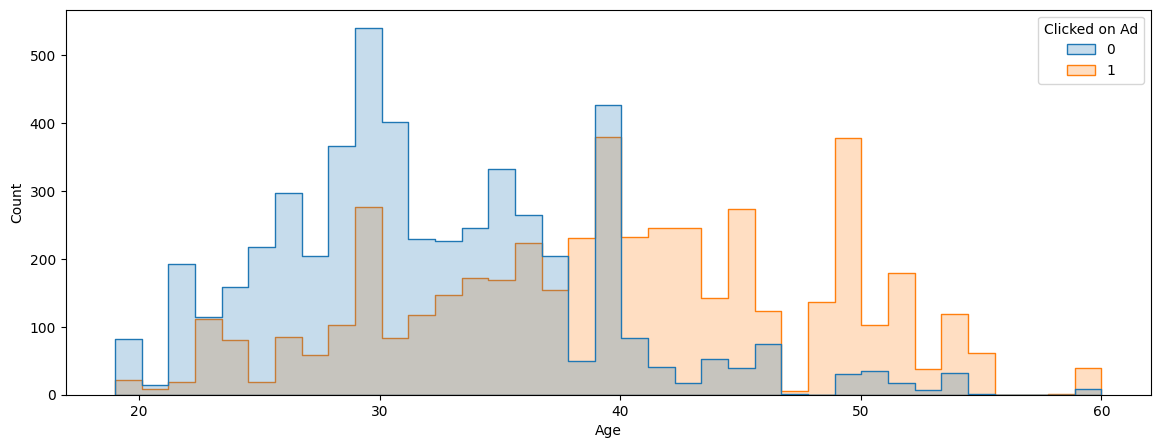

In [244]:
plt.figure(figsize=(14,5))
sns.histplot(ctr,x='Age',hue='Clicked on Ad',element='step')

Text(0.5, 1.0, 'Top Country Daily Time Spent on Site|')

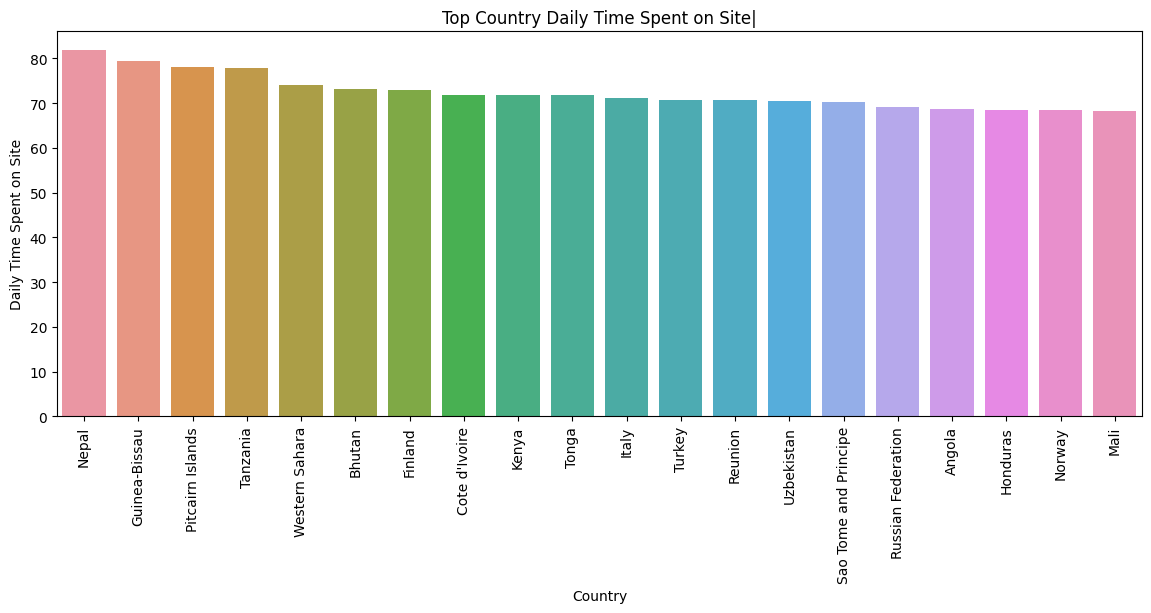

In [245]:
# Top Country daily time spend mean

city_time_spend=pd.DataFrame(ctr.groupby('Country')['Daily Time Spent on Site'].mean().sort_values(ascending=False))[0:20].reset_index(drop=False)
plt.figure(figsize=(14,5))
sns.barplot(city_time_spend,x='Country',y='Daily Time Spent on Site')
plt.xticks(rotation='vertical')
plt.ylabel('Daily Time Spent on Site')
plt.title('Top Country Daily Time Spent on Site|')

Text(0.5, 1.0, 'Top Country Area of Income')

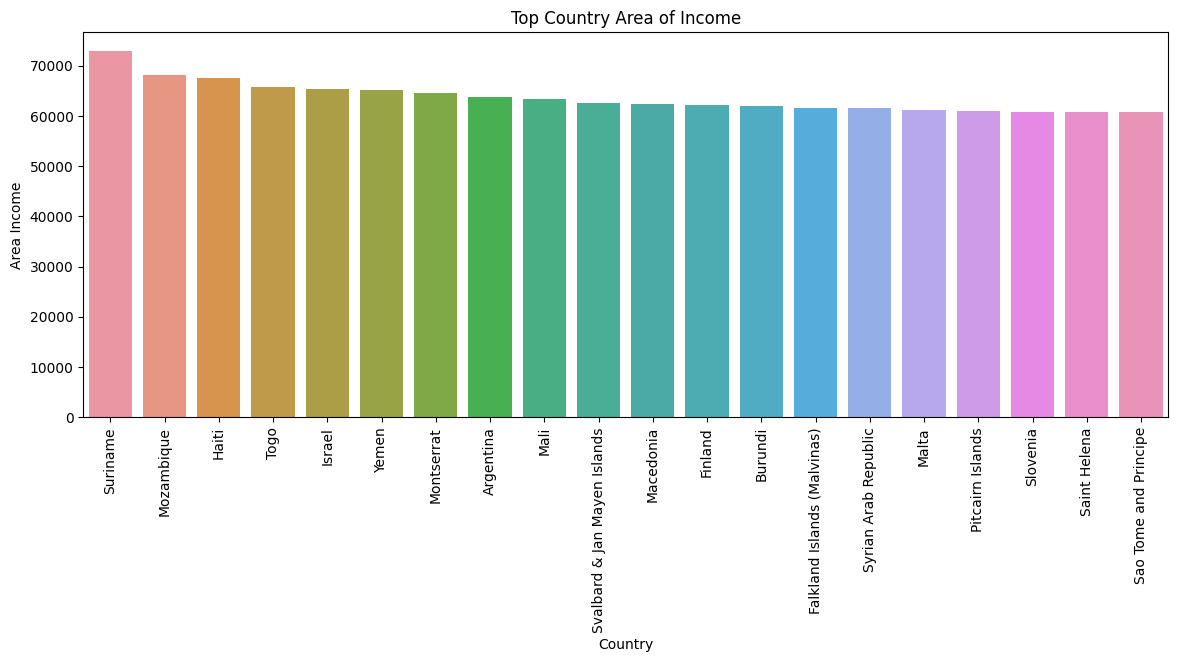

In [246]:
# top Country income
city_income=pd.DataFrame(ctr.groupby('Country')['Area Income'].mean().sort_values(ascending=False)[0:20].reset_index(drop=False))
plt.figure(figsize=(14,5))
sns.barplot(city_income,x='Country',y='Area Income')
plt.xticks(rotation='vertical')
plt.ylabel('Area Income')
plt.title('Top Country Area of Income')

Text(0.5, 1.0, 'each month Daily Time Spent on Site')

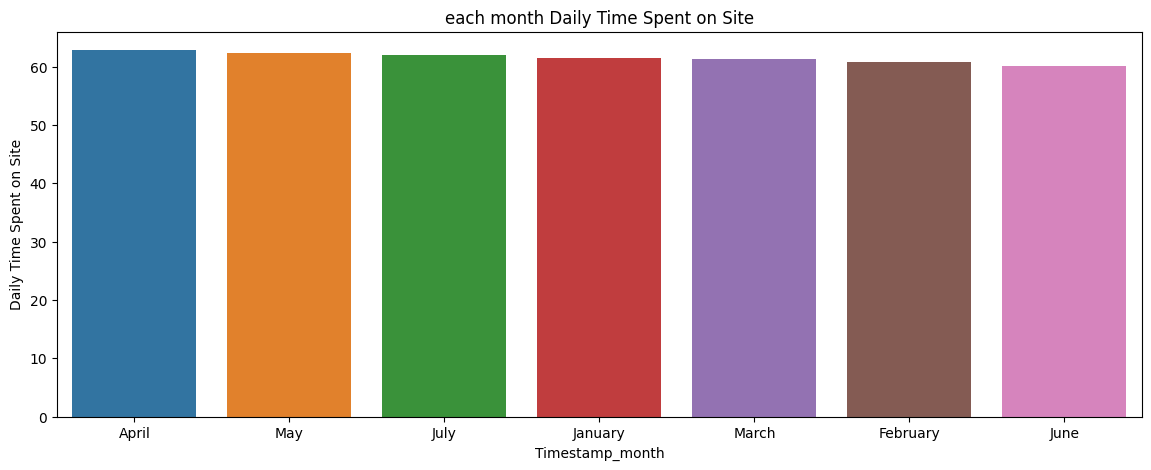

In [247]:
# each month Daily time spend on site mean
month_time=pd.DataFrame(ctr.groupby('Timestamp_month')['Daily Time Spent on Site'].mean().sort_values(ascending=False).reset_index(drop=False))
plt.figure(figsize=(14,5))
sns.barplot(month_time,x='Timestamp_month',y='Daily Time Spent on Site')
plt.ylabel('Daily Time Spent on Site')
plt.title('each month Daily Time Spent on Site')

Text(0.5, 1.0, 'each month Area Income')

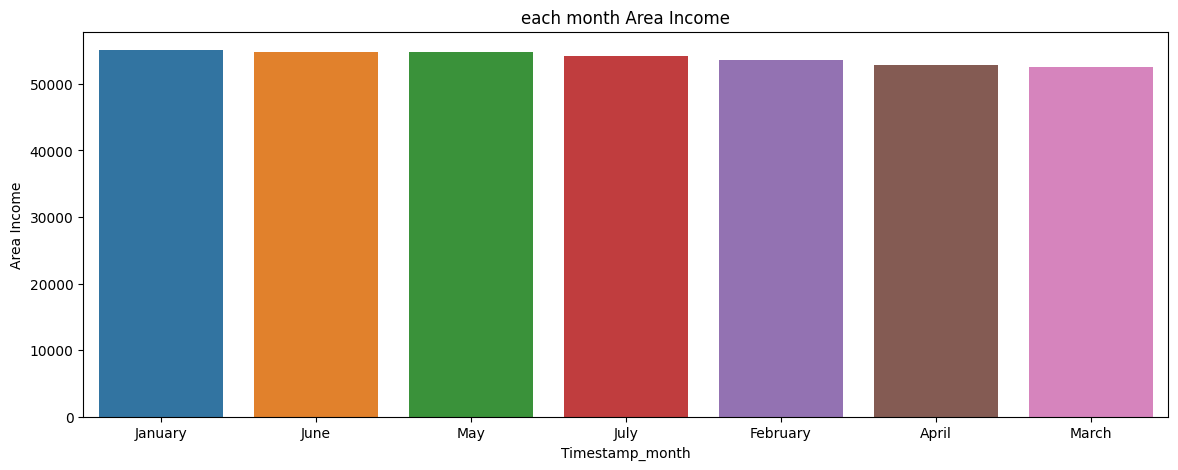

In [248]:
# each month area income mean

month_income=pd.DataFrame(ctr.groupby('Timestamp_month')['Area Income'].mean().sort_values(ascending=False).reset_index(drop=False))
plt.figure(figsize=(14,5))
sns.barplot(month_income,x='Timestamp_month',y='Area Income')

plt.ylabel('Area Income')
plt.title('each month Area Income')

In [249]:
ctr.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Timestamp_month,Timestamp_date,date
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:00,0,June,9,2016-06-09
1,41.73,31,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:00,0,January,16,2016-01-16
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:00,0,June,29,2016-06-29
3,59.88,28,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:00,0,June,21,2016-06-21
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:00,1,July,21,2016-07-21


<Axes: xlabel='Age', ylabel='Count'>

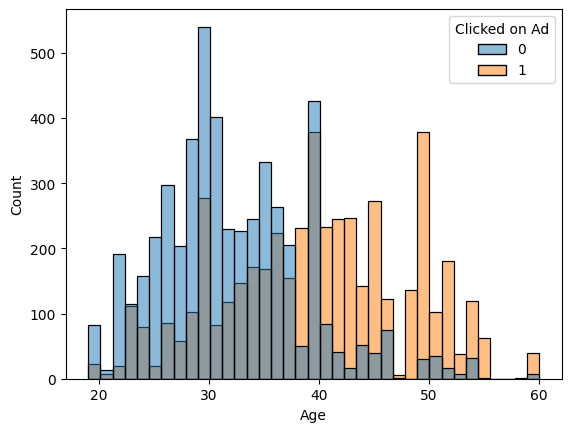

In [250]:
sns.histplot(data=ctr,x='Age',hue='Clicked on Ad')

In [251]:
ctr.groupby('Timestamp_month')['Clicked on Ad'].count().sort_values(ascending=False)

Timestamp_month
January     1642
April       1634
March       1459
July        1330
May         1305
February    1276
June        1139
Name: Clicked on Ad, dtype: int64

In [252]:
ctr.groupby('City')['Clicked on Ad'].count().sort_values(ascending=False)

City
Hubbardmouth         330
Lisafort             235
Wintersfort          225
Reyesfurt            205
Stewartbury          204
                    ... 
East Troyhaven         1
South Ronald           1
South Pamela           1
Josephberg             1
South Christopher      1
Name: Clicked on Ad, Length: 521, dtype: int64

In [253]:
from scipy.stats import chi2_contingency

# Example assuming 'categorical_attribute' and 'target_variable' are column names
chi2, p_value, dof, ex = chi2_contingency(pd.crosstab(ctr['Timestamp_month'], ctr['Clicked on Ad']))
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. There is a significant association between Timestamp_month class and clicked on ad.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant association between Timestamp_month class and clicked on ad.")

Chi-square statistic: 430.32896828570335
p-value: 8.390731332050818e-90

We reject the null hypothesis. There is a significant association between Timestamp_month class and clicked on ad.


In [254]:
pd.DataFrame(ctr.groupby('Country')['Clicked on Ad'].count().sort_values(ascending=False))

,Clicked on Ad
Country,
Australia,346
Czech Republic,325
Turkey,296
Qatar,222
Hong Kong,221
...,...
Monaco,1
Paraguay,1
Seychelles,1


- We have already seen that there are **207** unique countries in our Country attribute, and no single country is too dominant.

- A large number of unique elements will not allow a machine learning model to establish easily valuable relationships. For that reason, this variable will be excluded during training


In [255]:
pd.crosstab(ctr['Timestamp_month'],ctr['Clicked on Ad']).sort_values('Clicked on Ad',axis=1)

Clicked on Ad,0,1
Timestamp_month,,
April,554,1080
February,642,634
January,849,793
July,837,493
June,713,426
March,876,583
May,533,772


- we have already seen **7** unique values in timestamp_month attribute and every month too dominant.
- A small number of unique element will allow to make valuable relationship in machine learning model.for that reason,this attribute will be include during training


In [256]:
pd.crosstab(ctr['Gender'],ctr['Clicked on Ad'])

Clicked on Ad,0,1
Gender,,
Female,2567,2701
Male,2437,2080


- we have already seen **2** unique value in Gender attribute and all categories too dominant.
- A small number of unique element will make a valuable relationship in machine learning model, for that reason this attribute will include during training

In [257]:
pd.crosstab(ctr['City'],ctr['Clicked on Ad'])

Clicked on Ad,0,1
City,,
Alexanderfurt,2,5
Alexandrafort,1,0
Amandahaven,22,14
Amyfurt,9,8
Andersonfurt,1,0
...,...,...
Wrightburgh,168,0
Yangside,1,36
Youngburgh,3,1


- we have already seen **521** unique city in out data set and not sigle city not too dominant
- A large number of unique Categorie will not make valuable relationship in machine learning model.for that reason this attribute will excluded during trainig.


In [258]:
pd.crosstab(ctr['Timestamp_date'],ctr['Clicked on Ad'])

Clicked on Ad,0,1
Timestamp_date,,
1,49,90
2,101,16
3,479,312
4,64,298
5,223,312
6,129,285
7,121,37
8,442,195
9,297,190


- we have already seen **** unique categorie in timestamp_date attribute. every categorie not that much dominant as compare to Gender and Timestamp_month attribute
- A large number of unique categorie wull not make a valuable relationship in machine learning model. for that reason this attribute will exclude during training

<Axes: xlabel='Timestamp_date', ylabel='count'>

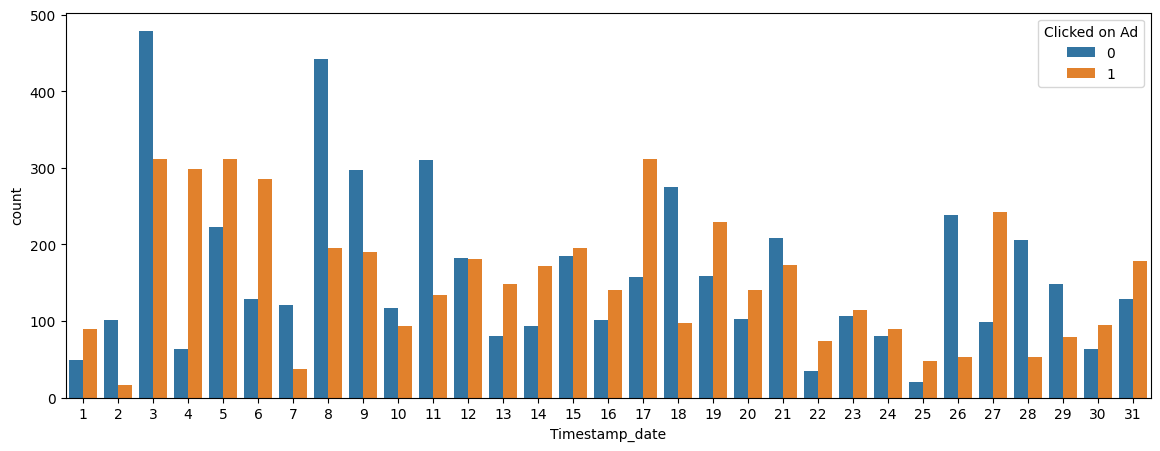

In [259]:
plt.figure(figsize=(14,5))
sns.countplot(data=ctr,x='Timestamp_date',hue='Clicked on Ad')

<Axes: xlabel='Timestamp_month', ylabel='count'>

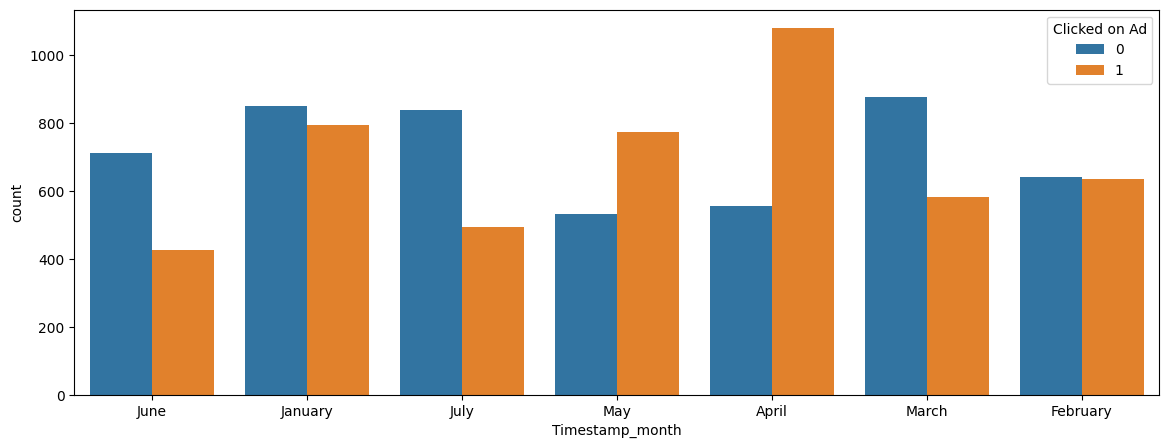

In [260]:
plt.figure(figsize=(14,5))
sns.countplot(ctr,x='Timestamp_month',hue='Clicked on Ad')

<Axes: xlabel='Gender', ylabel='count'>

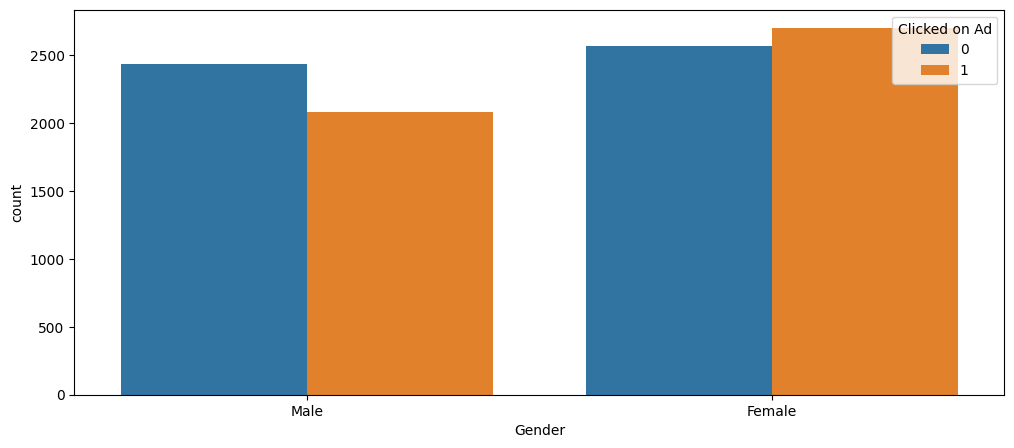

In [261]:
plt.figure(figsize=(12,5))
sns.countplot(ctr,x='Gender',hue='Clicked on Ad')

<Axes: xlabel='Timestamp_month', ylabel='count'>

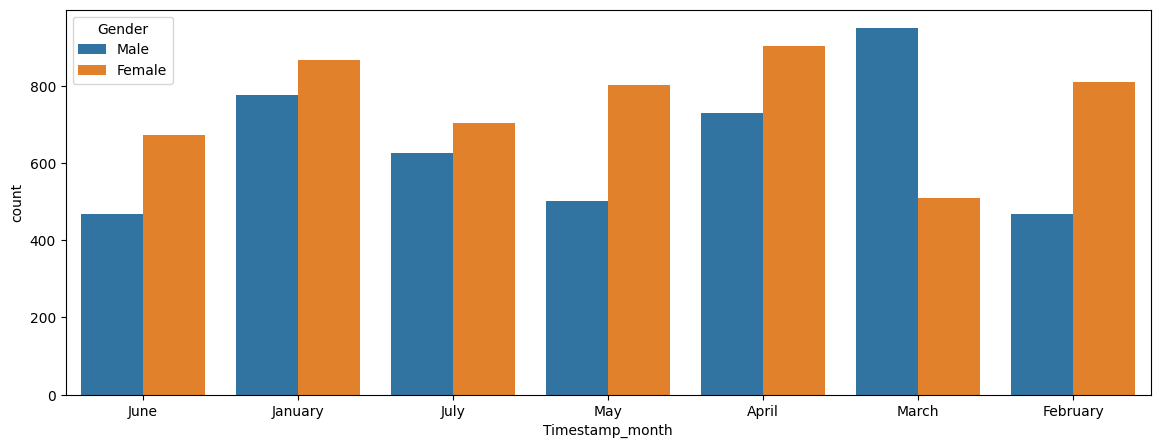

In [262]:
plt.figure(figsize=(14,5))
sns.countplot(ctr,x='Timestamp_month',hue='Gender')

In [263]:
ctr.drop(['City','Country','Timestamp','Timestamp_date','Ad Topic Line'],axis=1,inplace=True)

In [264]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   int32  
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Gender                    9785 non-null   object 
 5   Clicked on Ad             9785 non-null   int64  
 6   Timestamp_month           9785 non-null   object 
 7   date                      9785 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 649.8+ KB


Text(0.5, 1.0, 'Month and number of Clicks')

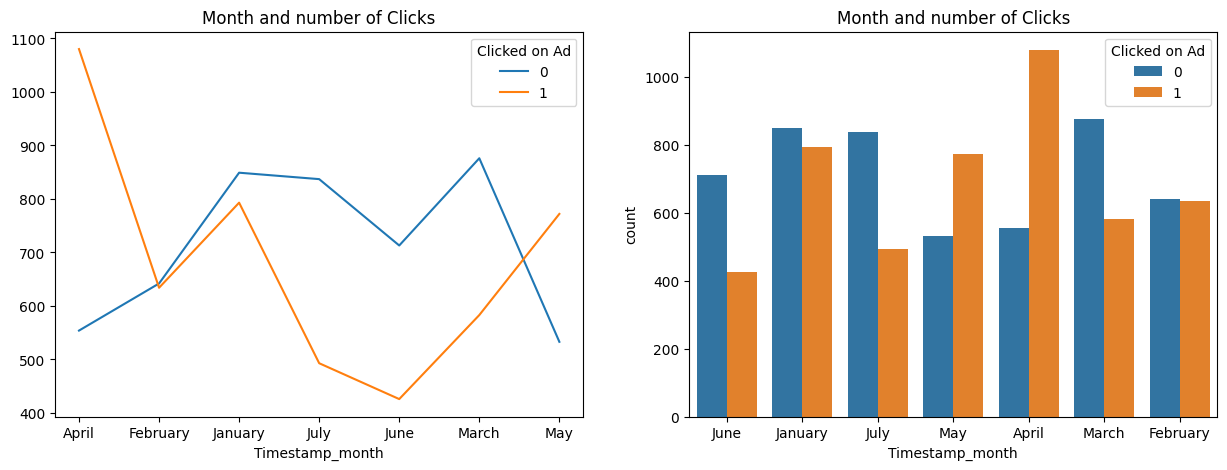

In [265]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
pd.crosstab(ctr['Timestamp_month'],ctr['Clicked on Ad']).plot(ax=ax[0])
sns.countplot(ctr,x='Timestamp_month',hue='Clicked on Ad')
ax[1].set_title('Month and number of Clicks')
ax[0].set_title('Month and number of Clicks')



Text(0.5, 1.0, 'user age group nuumber of clicked on ad')

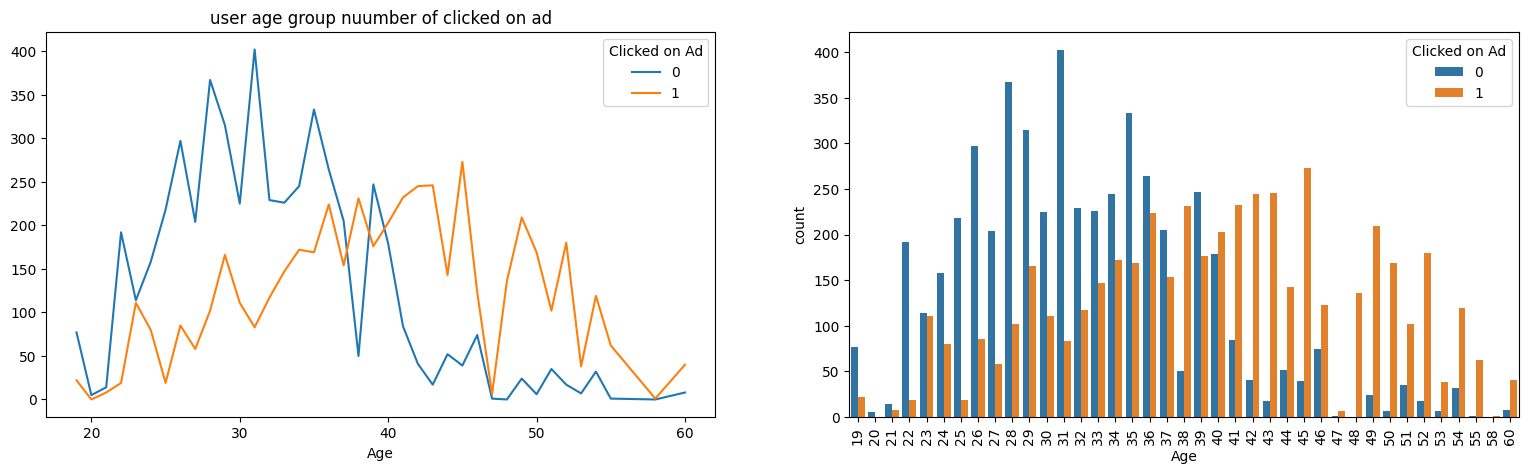

In [266]:
fig,ax=plt.subplots(1,2,figsize=(19,5))
pd.crosstab(ctr['Age'],ctr['Clicked on Ad']).plot(ax=ax[0])
sns.countplot(data=ctr,x='Age',hue='Clicked on Ad')
plt.xticks(rotation='vertical')
ax[0].set_title('user age group nuumber of clicked on ad')


In [267]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   int32  
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Gender                    9785 non-null   object 
 5   Clicked on Ad             9785 non-null   int64  
 6   Timestamp_month           9785 non-null   object 
 7   date                      9785 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 649.8+ KB


<Axes: xlabel='Gender', ylabel='Age'>

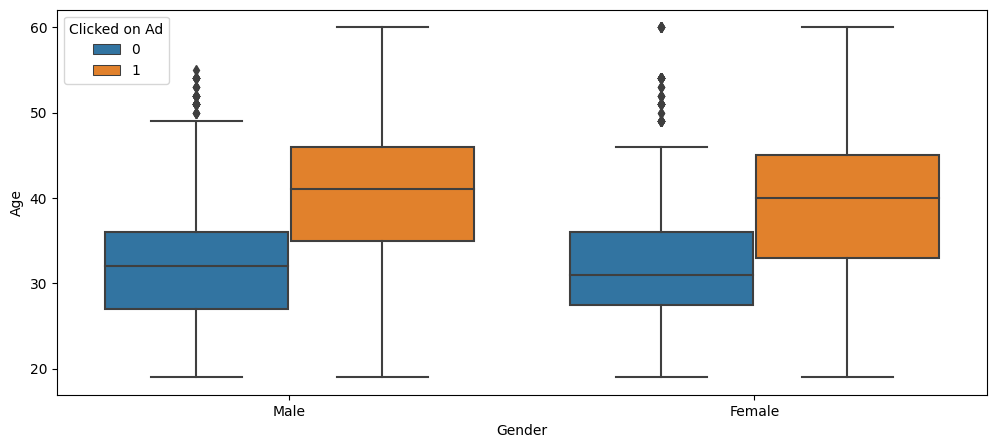

In [268]:
plt.figure(figsize=(12,5))
sns.boxplot(data=ctr,x='Gender',y='Age',hue='Clicked on Ad')

<Axes: xlabel='Timestamp_month', ylabel='Daily Internet Usage'>

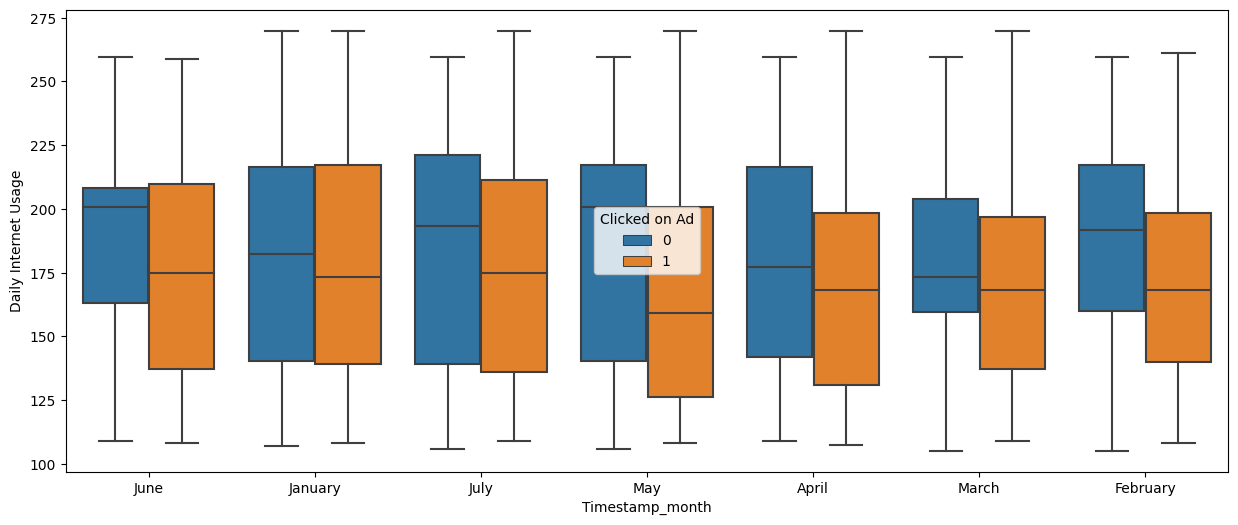

In [269]:
plt.figure(figsize=(15,6))

sns.boxplot(data=ctr,x='Timestamp_month',y='Daily Internet Usage',hue='Clicked on Ad')

<Axes: xlabel='Area Income'>

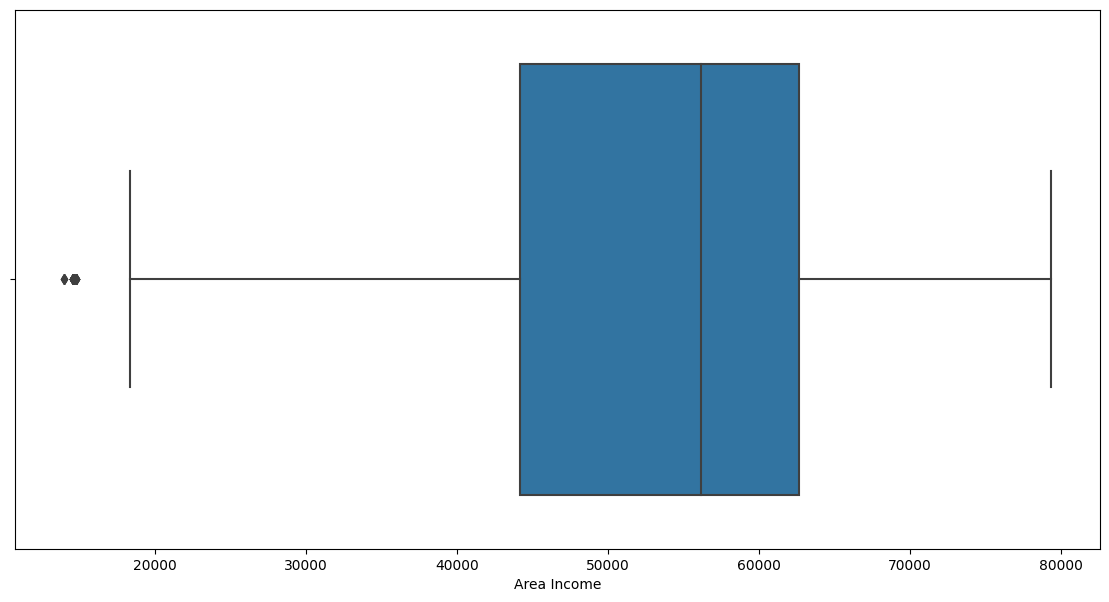

In [270]:
plt.figure(figsize=(14,7))
sns.boxplot(data=ctr,x='Area Income')

C:\Users\vagra\AppData\Local\Temp\ipykernel_7212\1994133546.py:2: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  ax=sns.kdeplot(data=ctr,x='Daily Time Spent on Site', y='Age', cmap="Reds", shade=True, shade_lowest=False)
C:\Users\vagra\AppData\Local\Temp\ipykernel_7212\1994133546.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data=ctr,x='Daily Time Spent on Site', y='Age', cmap="Reds", shade=True, shade_lowest=False)
C:\Users\vagra\AppData\Local\Temp\ipykernel_7212\1994133546.py:3: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  ax=sns.kdeplot(data=ctr,x='Daily Internet Usage',y='Age',cmap='Blues',shade=True,shade_lowest=False)
C:\Users\vagr

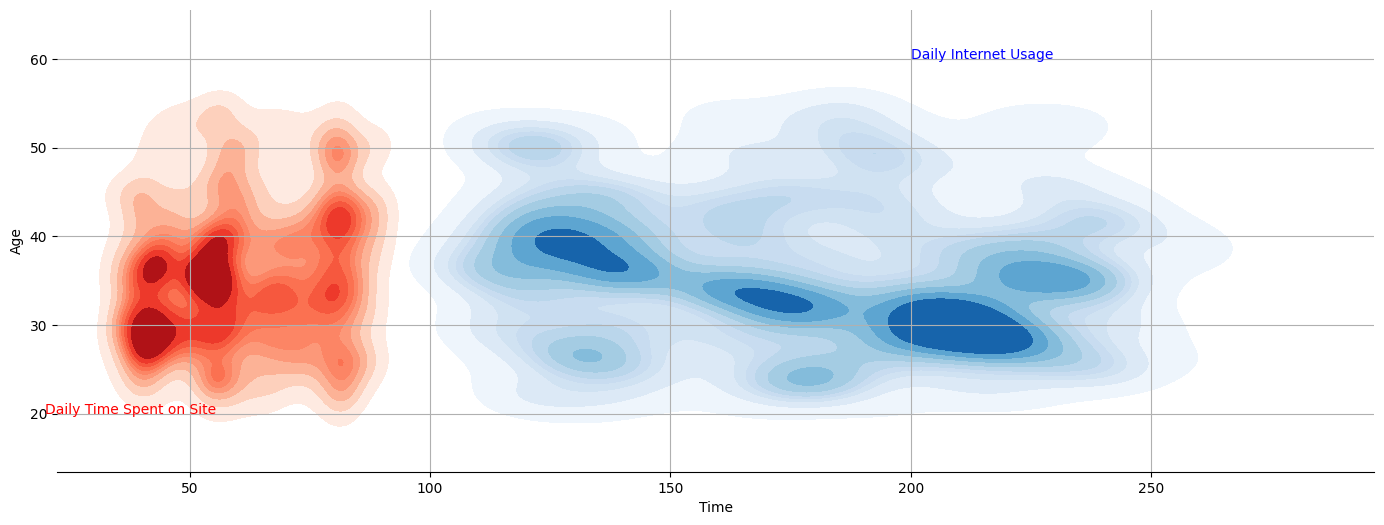

In [271]:
fig,ax=plt.subplots(figsize=(17,6))
ax=sns.kdeplot(data=ctr,x='Daily Time Spent on Site', y='Age', cmap="Reds", shade=True, shade_lowest=False)
ax=sns.kdeplot(data=ctr,x='Daily Internet Usage',y='Age',cmap='Blues',shade=True,shade_lowest=False)
ax.set_xlabel('Time')
ax.text(20,20,'Daily Time Spent on Site',size=10,color='r')
ax.text(200,60,'Daily Internet Usage',size=10,color='b')
sns.despine(left=True)
plt.grid()

- here we can see around 30 age group of user more spend on time website as well as more internet use 

C:\Users\vagra\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

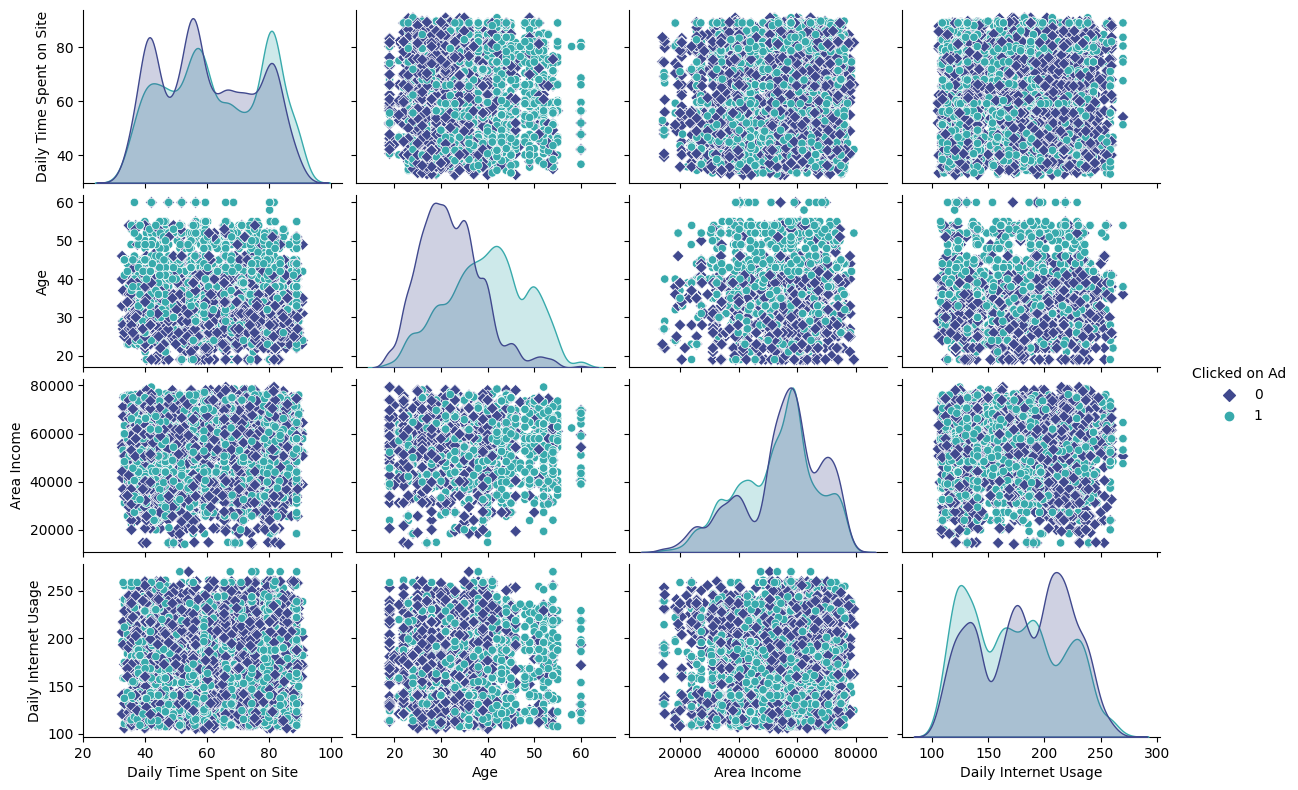

In [272]:
plt.figure(figsize=(15,5))
sns.pairplot(ctr,hue='Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette = 'mako',height = 2,aspect=1.5,markers=['D','o'])

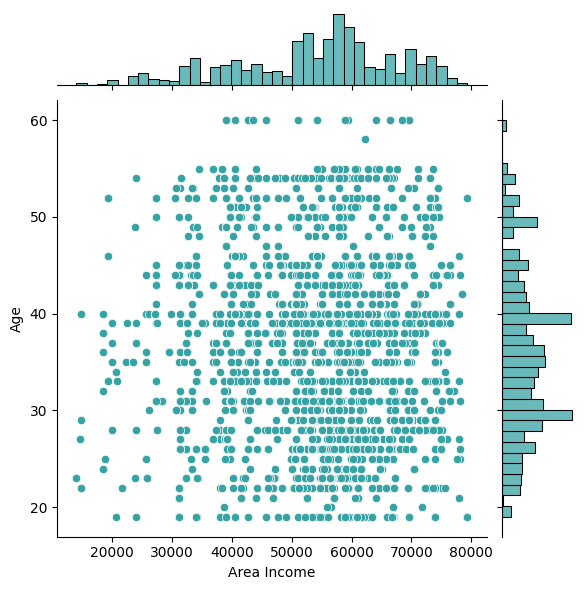

In [273]:
sns.jointplot(ctr,x='Area Income',y='Age',color='#38A3A5')

<Axes: xlabel='Daily Time Spent on Site', ylabel='Age'>

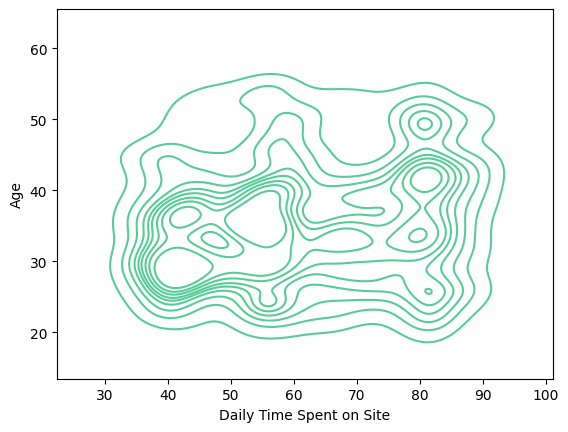

In [274]:
sns.kdeplot(ctr,x='Daily Time Spent on Site',y='Age',color='#57CC99')

In [275]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   int32  
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Gender                    9785 non-null   object 
 5   Clicked on Ad             9785 non-null   int64  
 6   Timestamp_month           9785 non-null   object 
 7   date                      9785 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 649.8+ KB


C:\Users\vagra\AppData\Local\Temp\ipykernel_7212\3665411305.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ctr[i],bins=20,color="#00203FFF")
C:\Users\vagra\AppData\Local\Temp\ipykernel_7212\3665411305.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ctr[i],bins=20,color="#00203FFF")
C:\U

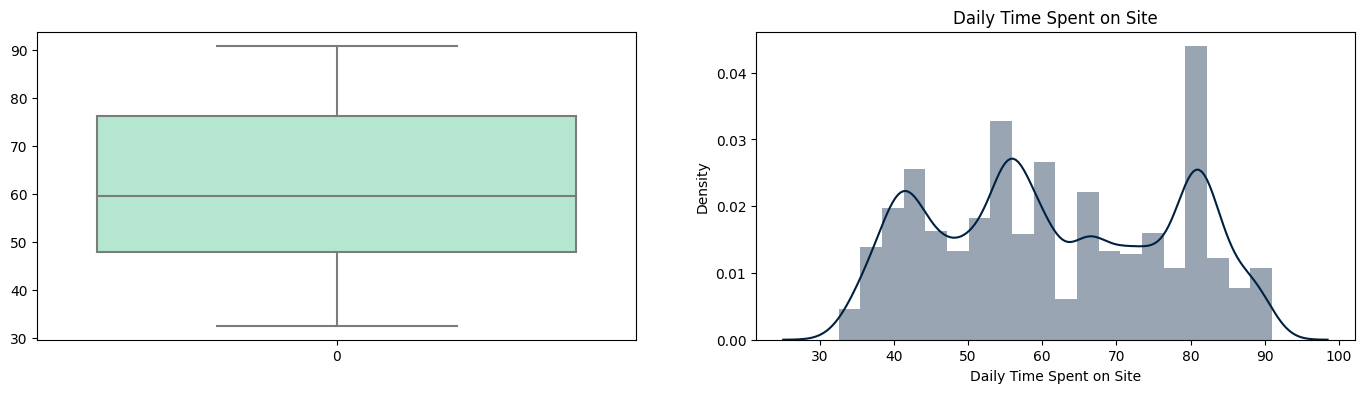

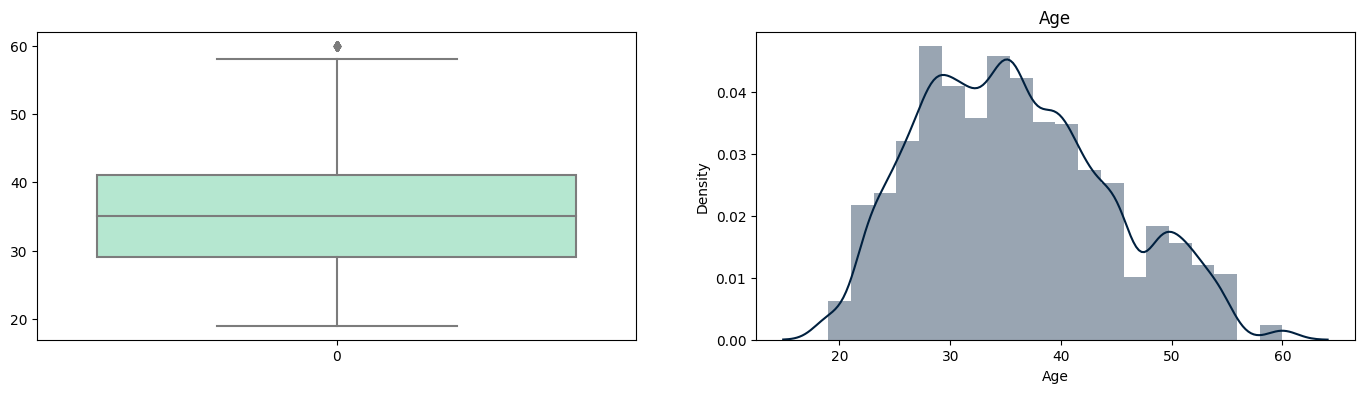

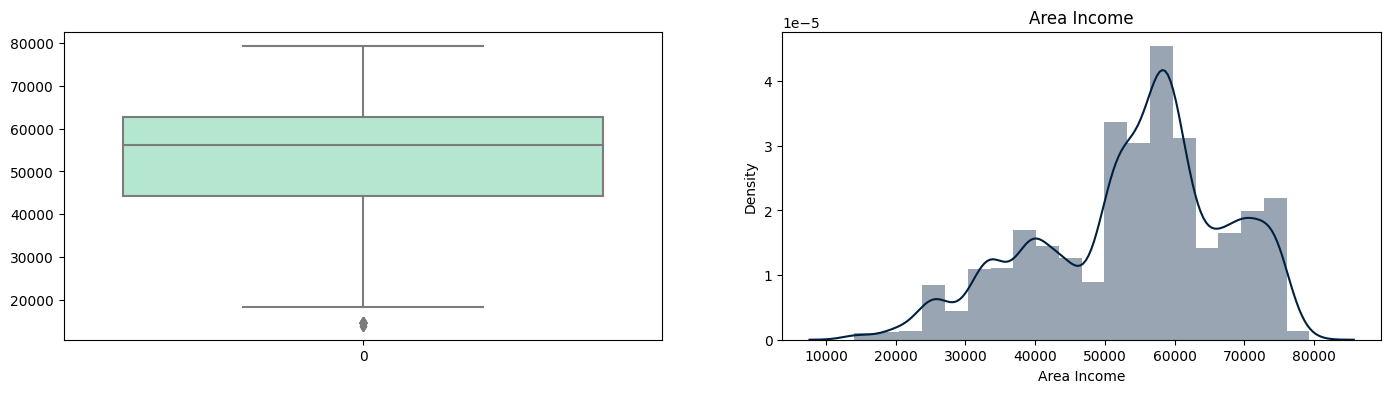

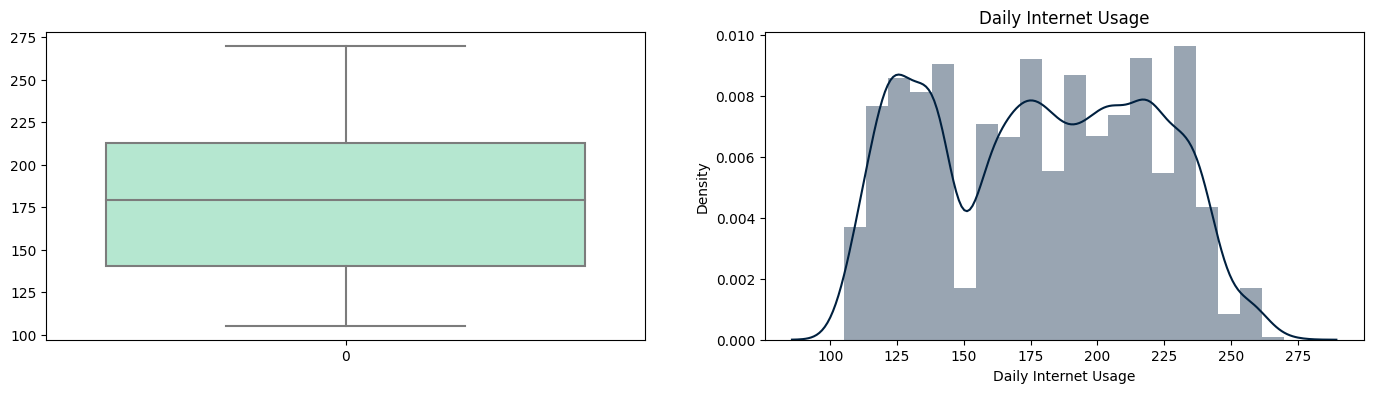

In [276]:
num_cat=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
for i in num_cat:
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    sns.boxplot(ctr[i],color="#ADEFD1FF")
    plt.subplot(1,2,2)
    sns.distplot(ctr[i],bins=20,color="#00203FFF")
    plt.title(i)

In [277]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   int32  
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Gender                    9785 non-null   object 
 5   Clicked on Ad             9785 non-null   int64  
 6   Timestamp_month           9785 non-null   object 
 7   date                      9785 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 907.8+ KB


In [278]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
y=pd.DataFrame(oe.fit_transform(ctr[['Gender','Timestamp_month']]),dtype=int,columns=['Gender1','Timestamp_month1'])
# ctr=ctr.join(y,how='inner')




In [279]:
ctr=ctr.join(y,how='inner')

<Axes: >

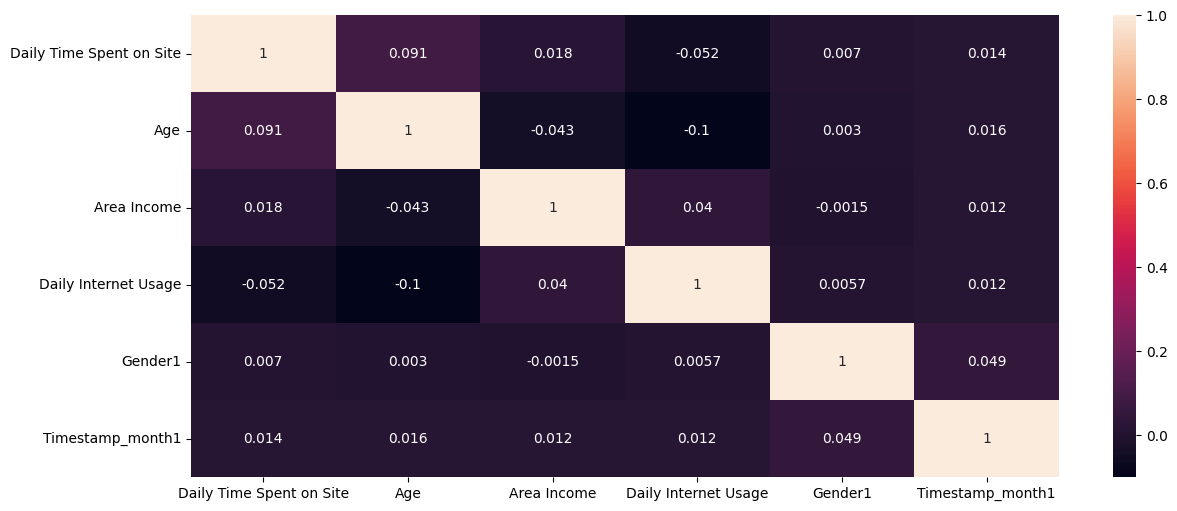

In [280]:
new =pd.DataFrame()
vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Gender1','Timestamp_month1']
for i in vars:
    new[i]=pd.DataFrame(ctr[i])

fig = plt.figure(figsize = (14,6))
sns.heatmap(new.corr(), annot = True) # Degree of relationship i.e correlation using heatmap

In [281]:
new.rename(columns={'Gender1':'Gender','Timestamp_month1':'Timestamp_month'},inplace=True)
new

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp_month
0,62.26,32,69481.85,172.83,1,4
1,41.73,31,61840.26,207.17,1,2
2,44.40,30,57877.15,172.83,0,4
3,59.88,28,56180.93,207.17,0,4
4,49.21,30,54324.73,201.58,0,3
...,...,...,...,...,...,...
9779,81.75,35,58677.69,236.87,1,5
9780,66.08,60,66504.16,130.86,0,5
9781,42.60,31,56180.93,207.17,1,2
9783,55.60,32,70505.06,182.20,0,2


In [282]:
exten_qual_cols = [
    'Daily Time Spent on Site', 'Age',
    'Area Income', 'Daily Internet Usage'
]
outliers_new=pd.DataFrame(columns=new.columns)
for col in exten_qual_cols:
    des=new[col].describe()
    print(des,'\n\n')
    IQR=des['75%']-des['25%']
    upper_limit=des['75%']+1.5*IQR
    lower_limit=des['25%']-1.5*IQR
    
    outliers=new[(new[col]>upper_limit) | (new[col]<lower_limit)]
    if not outliers.empty:
        print(f'outliers present in {col}')
        outliers_new=pd.concat([outliers_new,outliers])
    else:
        print(f'outliers not present in {col}')
    print(f'upper limit of {col} is {upper_limit}')
    print(f'lower limit of {col} is {lower_limit} \n\n\n')



    
  


count    9583.000000
mean       61.595435
std        15.717044
min        32.600000
25%        48.030000
50%        59.590000
75%        76.270000
max        90.970000
Name: Daily Time Spent on Site, dtype: float64 


outliers not present in Daily Time Spent on Site
upper limit of Daily Time Spent on Site is 118.63
lower limit of Daily Time Spent on Site is 5.670000000000009 



count    9583.000000
mean       35.854117
std         8.537393
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64 


outliers not present in Age
upper limit of Age is 61.5
lower limit of Age is 9.5 



count     9583.000000
mean     53945.282892
std      13354.064062
min      13996.500000
25%      44211.385000
50%      56180.930000
75%      62669.590000
max      79332.330000
Name: Area Income, dtype: float64 


outliers present in Area Income
upper limit of Area Income is 90356.89749999999
lower limit of Area Income is 16524.0774999

- Area of income in outliers

In [283]:
ctr

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Timestamp_month,date,Gender1,Timestamp_month1
0,62.26,32,69481.85,172.83,Male,0,June,2016-06-09,1,4
1,41.73,31,61840.26,207.17,Male,0,January,2016-01-16,1,2
2,44.40,30,57877.15,172.83,Female,0,June,2016-06-29,0,4
3,59.88,28,56180.93,207.17,Female,0,June,2016-06-21,0,4
4,49.21,30,54324.73,201.58,Female,1,July,2016-07-21,0,3
...,...,...,...,...,...,...,...,...,...,...
9779,81.75,35,58677.69,236.87,Female,0,February,2016-02-11,1,5
9780,66.08,60,66504.16,130.86,Female,1,April,2016-04-15,0,5
9781,42.60,31,56180.93,207.17,Female,0,January,2016-01-03,1,2
9783,55.60,32,70505.06,182.20,Female,0,April,2016-04-28,0,2


In [284]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9583 entries, 0 to 9784
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9583 non-null   float64
 1   Age                       9583 non-null   int32  
 2   Area Income               9583 non-null   float64
 3   Daily Internet Usage      9583 non-null   float64
 4   Gender                    9583 non-null   object 
 5   Clicked on Ad             9583 non-null   int64  
 6   Timestamp_month           9583 non-null   object 
 7   date                      9583 non-null   object 
 8   Gender1                   9583 non-null   int32  
 9   Timestamp_month1          9583 non-null   int32  
dtypes: float64(3), int32(3), int64(1), object(3)
memory usage: 711.2+ KB


In [285]:
ctr.iloc[outliers_new.index]['Clicked on Ad'].value_counts()

Clicked on Ad
1    17
0    17
Name: count, dtype: int64

In [308]:
outliers_new

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp_month
171,40.47,27,14548.06,190.17,0,1
199,51.56,27,14548.06,193.29,1,5
388,49.21,27,14548.06,193.29,0,2
1583,49.21,27,14548.06,184.94,1,0
1716,83.16,27,14548.06,190.17,1,6
1961,39.30,27,14548.06,135.31,1,5
2122,66.79,29,14775.50,184.23,0,4
2771,74.59,23,13996.50,172.81,0,1
3160,69.15,27,14548.06,239.32,0,0
3595,51.56,27,14548.06,131.29,0,2


- this 43 people outliers in Area of income attribute
- these outliers show all people came from low income area
- unless the data source data of area income there is incorrectly or misunderstanding in how that variable was collected/created, there is no need to remove these.
- outliers in age 27 is more dominant to other age group
- outliers in gender attribute Female is more dominant



In [307]:
ctr.loc[outliers_new.index]['Age'].value_counts()

Age
27    22
22     7
23     3
29     1
40     1
Name: count, dtype: int64

In [322]:
outliers_new['Gender'].value_counts()

Gender
0    22
1    12
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

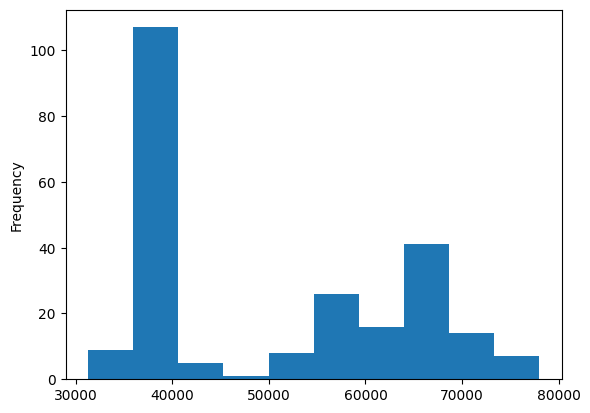

In [320]:
ctr[(ctr['Age']==27)&(ctr['Area Income']>16524.077499999992)]['Area Income'].plot(kind='hist')